# Table of Content
* [1.Descrizione dataset](#1.Descrizione-dataset)
* [2.Import librerie e dati](#2.Import-librerie-e-dati)
* [3.Analisi esplorativa dei dati](#3.Analisi-esplorativa-dei-dati)
    * [3.1.Consegne](#3.1.Consegne)
    * [3.2.Somministrazioni](#3.2.Somministrazioni)

## 1.Descrizione dataset

Il seguente dataset è riferito ai dati ufficiali del governo italiano, disponibili su https://github.com/italia/covid19-opendata-vaccini

Nella cartella dati si possono trovare 6 tabelle in formato json e csv:


*   **consegne-vaccini-latest**: dati sul totale delle consegne giornaliere dei vaccini suddivise per regioni.
*   **vaccini-summary-latest**: dati sul totale delle consegne e somministrazioni avvenute sino ad oggi, includendo la percentuale di dosi somministrate (sul totale delle dosi consegnate) suddivise per regioni.
*   **somministrazioni-vaccini-latest**: dati sulle somministrazioni giornaliere dei vaccini suddivisi per regioni, fasce d'età e categorie di appartenenza dei soggetti vaccinati.
*   **somministrazioni-vaccini-summary-latest**: dati sul totale delle somministrazioni giornaliere per regioni e categorie di appartenenza dei soggetti vaccinati.
*   **punti-somministrazione-latest**: punti di somministrazione per ciascuna Regione e Provincia Autonoma.
*   **anagrafica-vaccini-summary-latest**: totali delle somministrazioni per fasce d'età.

## 2.Import librerie e dati

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,10)

import seaborn as sns
sns.set()

import utils as u

In [2]:
df_consegne = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv', 
                          parse_dates=['data_consegna'])

In [3]:
df_vaccini_aree_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/vaccini-summary-latest.csv')

In [4]:
df_somministrazioni = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv',
                                  parse_dates=['data_somministrazione'])

In [5]:
df_punti_somministraz = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-tipologia.csv')

In [6]:
df_vaccini_fasce_summary = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv')

## 3.Analisi esplorativa dei dati

### 3.1.Consegne

In [7]:
df_consegne.shape

(1122, 8)

In [8]:
df_consegne.tail()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
1117,VEN,Moderna,20500,2021-05-01,ITH,ITH3,5,Veneto
1118,VEN,Vaxzevria (AstraZeneca),151100,2021-05-01,ITH,ITH3,5,Veneto
1119,VEN,Pfizer/BioNTech,171990,2021-05-05,ITH,ITH3,5,Veneto
1120,VEN,Moderna,29300,2021-05-07,ITH,ITH3,5,Veneto
1121,VEN,Pfizer/BioNTech,171990,2021-05-12,ITH,ITH3,5,Veneto


In [9]:
df_consegne.columns

Index(['area', 'fornitore', 'numero_dosi', 'data_consegna', 'codice_NUTS1',
       'codice_NUTS2', 'codice_regione_ISTAT', 'nome_area'],
      dtype='object')

In [10]:
tot_consegne = df_consegne.numero_dosi.sum()
tot_consegne

29559660

In [11]:
df_consegne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   area                  1122 non-null   object        
 1   fornitore             1122 non-null   object        
 2   numero_dosi           1122 non-null   int64         
 3   data_consegna         1122 non-null   datetime64[ns]
 4   codice_NUTS1          1122 non-null   object        
 5   codice_NUTS2          1122 non-null   object        
 6   codice_regione_ISTAT  1122 non-null   int64         
 7   nome_area             1122 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 70.2+ KB


In [12]:
df_consegne_t = df_consegne.set_index('data_consegna')
df_consegne_t.head()

,area,fornitore,numero_dosi,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
data_consegna,,,,,,,
2020-12-27,ABR,Pfizer/BioNTech,135,ITF,ITF1,13,Abruzzo
2020-12-30,ABR,Pfizer/BioNTech,7800,ITF,ITF1,13,Abruzzo
2021-01-05,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-07,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo
2021-01-11,ABR,Pfizer/BioNTech,3900,ITF,ITF1,13,Abruzzo


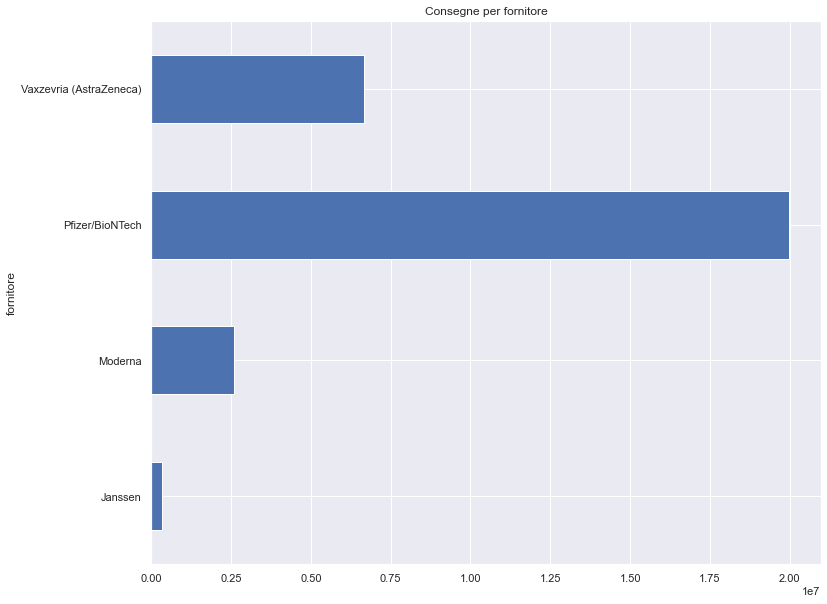

In [13]:
df_consegne.groupby('fornitore')['numero_dosi']\
            .sum()\
            .plot(kind='barh',
                  title='Consegne per fornitore')
plt.show()

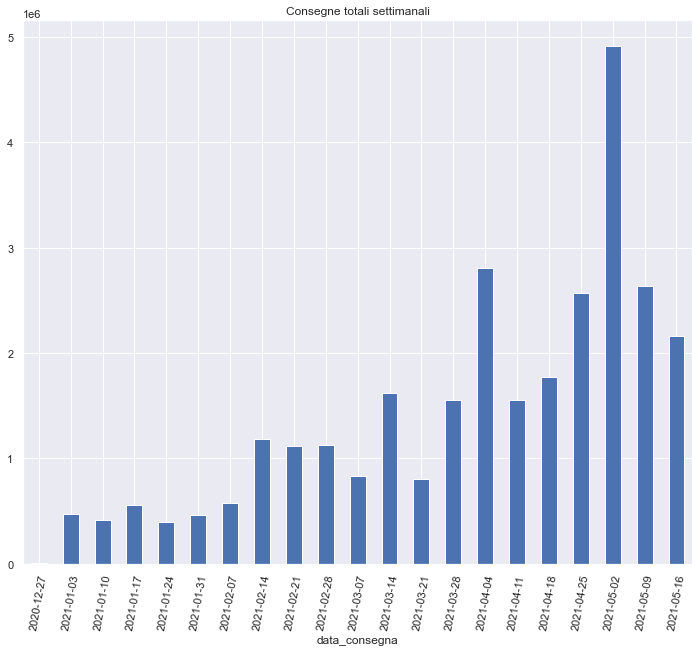

In [44]:
fig, ax = plt.subplots()
df_consegne_t.resample('W').sum()['numero_dosi'].plot(kind='bar', title='Consegne totali settimanali')
ax.set_xticklabels(sorted(set(df_consegne_t.resample('W').sum().index.astype(str).values)), rotation=80)
plt.show()

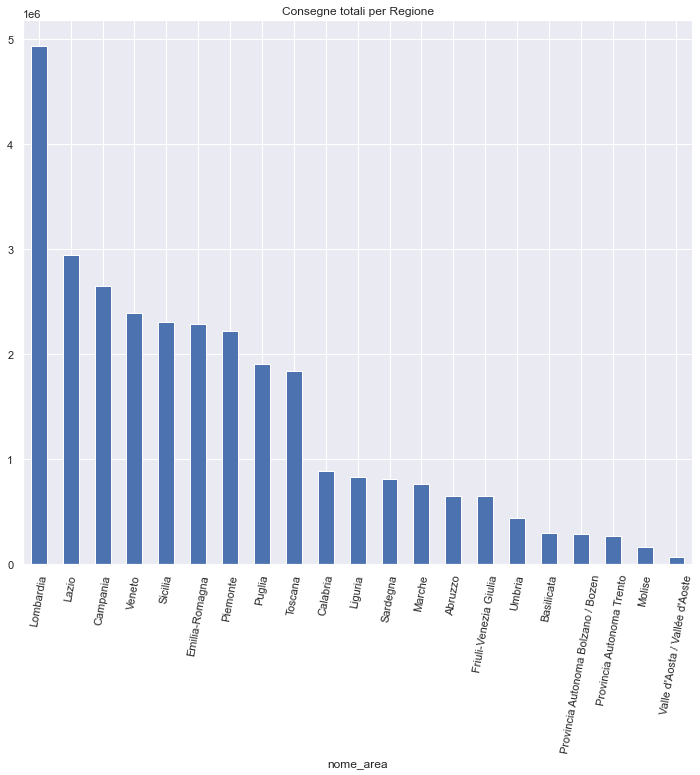

In [50]:
df_consegne.groupby('nome_area')\
            .sum()['numero_dosi']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Consegne totali per Regione')
plt.xticks(rotation=80)
plt.show()

In [16]:
df_consegne_sett = u.get_dfweekly_from_df(df_consegne_t, 'fornitore', 'numero_dosi')
df_consegne_sett

,numero_dosi,fornitore
data_consegna,,
2020-12-27,9750,Pfizer/BioNTech
2021-01-03,469950,Pfizer/BioNTech
2021-01-10,419250,Pfizer/BioNTech
2021-01-17,510900,Pfizer/BioNTech
2021-01-24,397800,Pfizer/BioNTech
...,...,...
2021-04-11,0,Janssen
2021-04-18,0,Janssen
2021-04-25,179800,Janssen


In [51]:
sorted(set(df_consegne_sett.index.astype(str).values))

['2020-12-27',
 '2021-01-03',
 '2021-01-10',
 '2021-01-17',
 '2021-01-24',
 '2021-01-31',
 '2021-02-07',
 '2021-02-14',
 '2021-02-21',
 '2021-02-28',
 '2021-03-07',
 '2021-03-14',
 '2021-03-21',
 '2021-03-28',
 '2021-04-04',
 '2021-04-11',
 '2021-04-18',
 '2021-04-25',
 '2021-05-02',
 '2021-05-09',
 '2021-05-16']

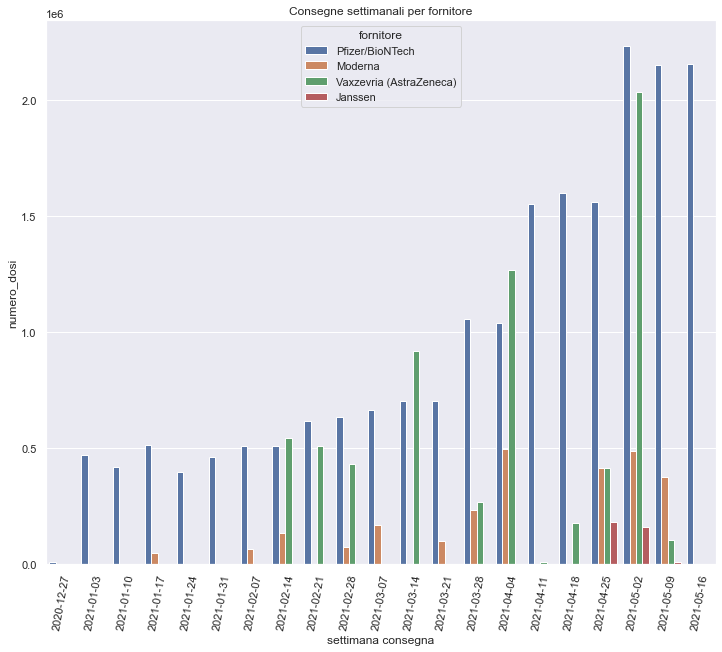

In [57]:
fig, ax = plt.subplots()
sns.barplot(data = df_consegne_sett, x=df_consegne_sett.index, y='numero_dosi', hue='fornitore',ci=None, ax=ax)
plt.title('Consegne settimanali per fornitore')
plt.xticks(rotation=80)
plt.xlabel('settimana consegna')
ax.set_xticklabels(sorted(set(df_consegne_sett.index.astype(str).values)))
plt.show()

### 3.2.Somministrazioni

In [18]:
df_somministrazioni.shape

(49697, 22)

In [19]:
df_somministrazioni.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_60_69,...,categoria_forze_armate,categoria_personale_scolastico,categoria_soggetti_fragili,categoria_altro,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
49692,2021-05-12,Vaxzevria (AstraZeneca),VEN,50-59,75,82,0,4,1,0,...,36,73,0,43,43,114,ITH,ITH3,5,Veneto
49693,2021-05-12,Vaxzevria (AstraZeneca),VEN,60-69,1583,1463,4,5,0,2796,...,1,66,27,147,2989,57,ITH,ITH3,5,Veneto
49694,2021-05-12,Vaxzevria (AstraZeneca),VEN,70-79,162,192,0,1,0,0,...,0,0,1,0,343,11,ITH,ITH3,5,Veneto
49695,2021-05-12,Vaxzevria (AstraZeneca),VEN,80-89,3,10,0,0,0,0,...,0,0,0,0,13,0,ITH,ITH3,5,Veneto
49696,2021-05-12,Vaxzevria (AstraZeneca),VEN,90+,0,1,0,0,0,0,...,0,0,0,0,1,0,ITH,ITH3,5,Veneto


In [20]:
df_somministrazioni['totale'] = df_somministrazioni['sesso_maschile'] + df_somministrazioni['sesso_femminile']

In [21]:
totale_somministrazioni = df_somministrazioni['totale'].sum()
totale_somministrazioni

25431022

In [22]:
df_somministrazioni_t = df_somministrazioni.set_index('data_somministrazione')

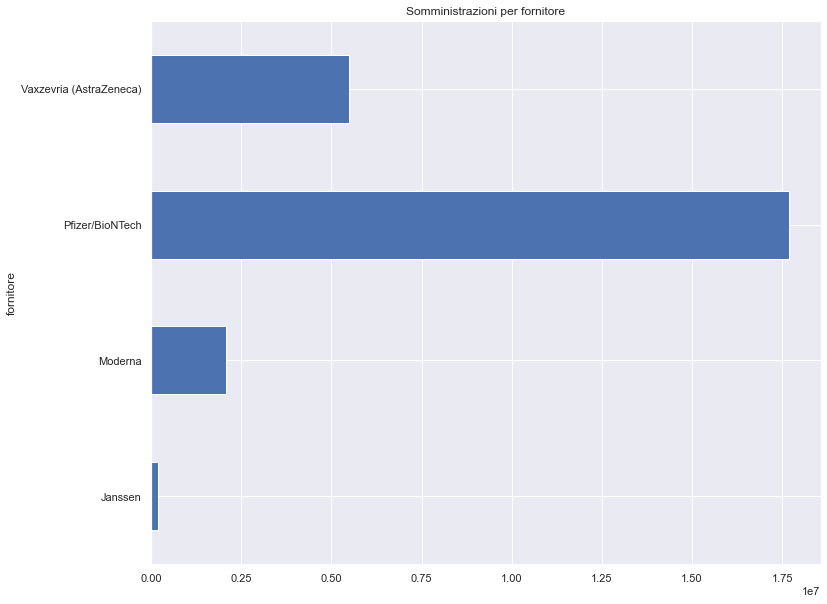

In [23]:
df_somministrazioni.groupby('fornitore')['totale']\
            .sum()\
            .plot(kind='barh',
                  title='Somministrazioni per fornitore')
plt.show()

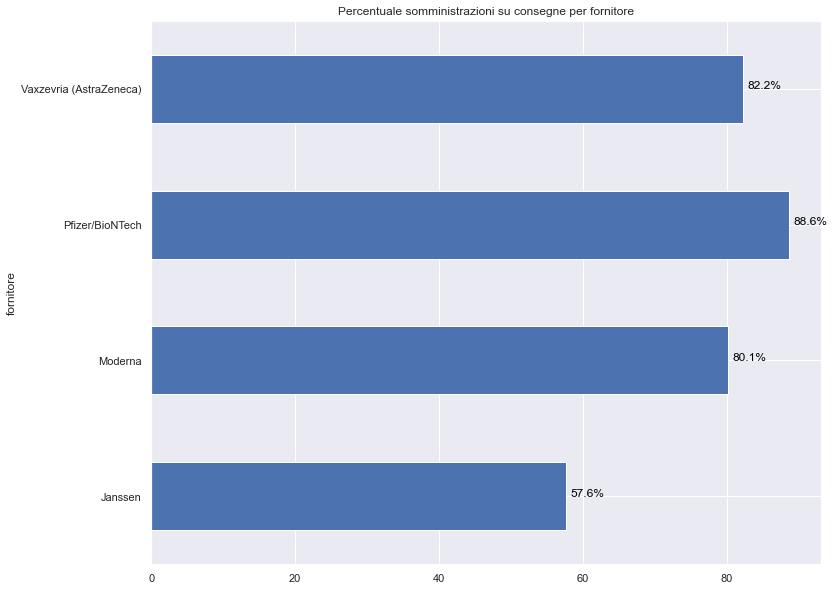

In [24]:
somministrazioni_consegne_forn = df_somministrazioni.groupby('fornitore')['totale'].sum()/df_consegne.groupby('fornitore')['numero_dosi'].sum()
somministrazioni_consegne_forn = round(somministrazioni_consegne_forn*100, 1)
somministrazioni_consegne_forn.plot(kind='barh', title='Percentuale somministrazioni su consegne per fornitore')
for index, row in enumerate(somministrazioni_consegne_forn):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")
plt.show()

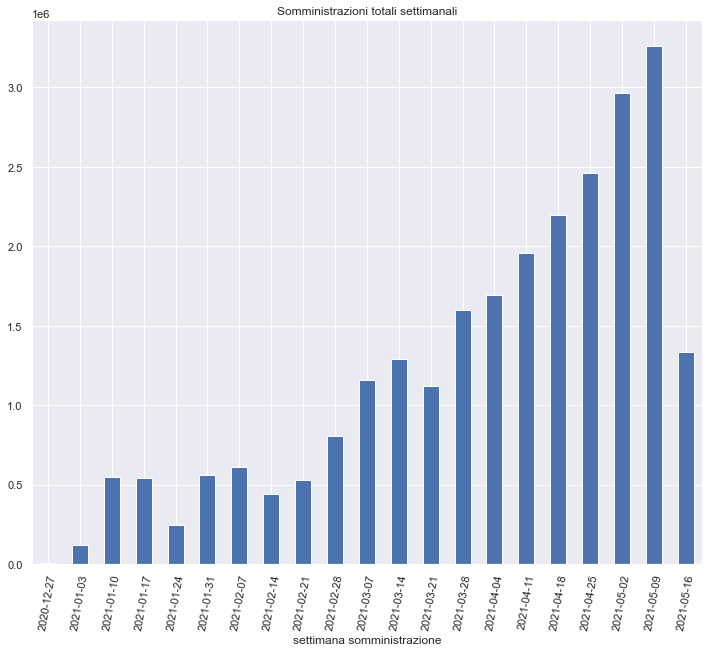

In [60]:
fig, ax = plt.subplots()
df_somministrazioni_t.resample('W').sum()['totale'].plot(kind='bar', title='Somministrazioni totali settimanali')
ax.set_xticklabels(sorted(set(df_somministrazioni_t.resample('W').sum().index.astype(str).values)), rotation=80)
plt.xlabel('settimana somministrazione')
plt.show()

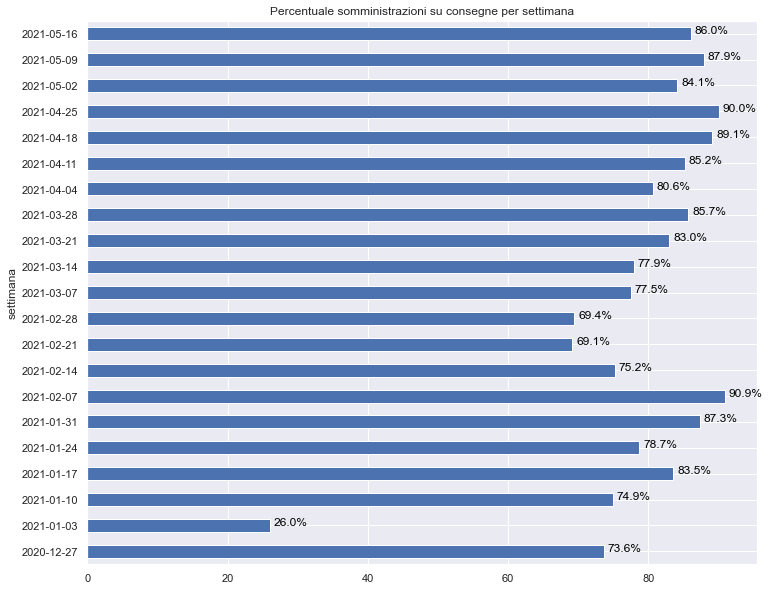

In [64]:
fig, ax =plt.subplots()
somministrazioni_consegne_sett = df_somministrazioni_t.resample('W').sum()['totale'].cumsum()/df_consegne_t.resample('W').sum()['numero_dosi'].cumsum()
somministrazioni_consegne_sett = round(somministrazioni_consegne_sett*100, 1)
somministrazioni_consegne_sett.plot(kind='barh', title='Percentuale somministrazioni su consegne per settimana')
for index, row in enumerate(somministrazioni_consegne_sett):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black', ha="center")

ax.set_yticklabels(sorted(set(somministrazioni_consegne_sett.index.astype(str).values)))
plt.ylabel('settimana')
plt.show()

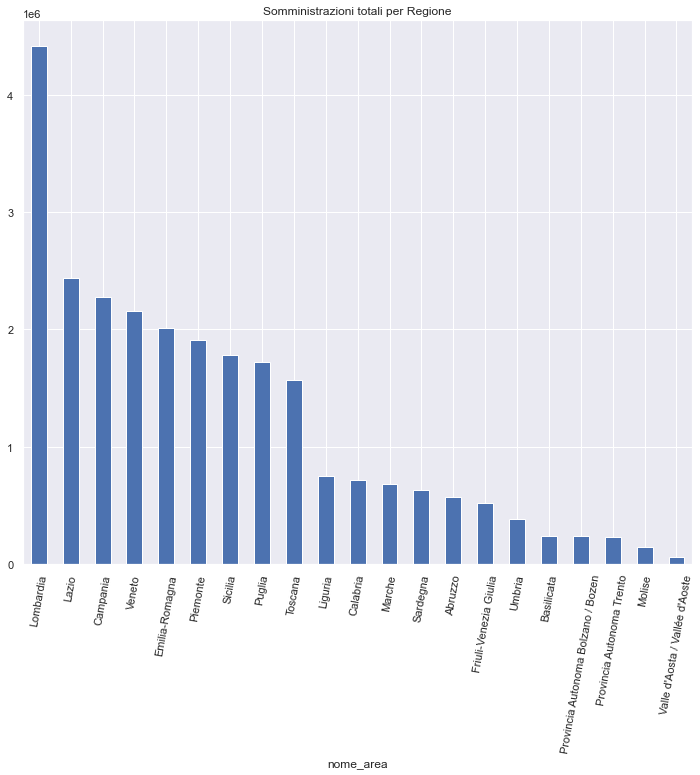

In [65]:
df_somministrazioni.groupby('nome_area')\
            .sum()['totale']\
            .sort_values(ascending=False)\
            .plot(kind='bar',
                    title='Somministrazioni totali per Regione')
plt.xticks(rotation=80)
plt.show()

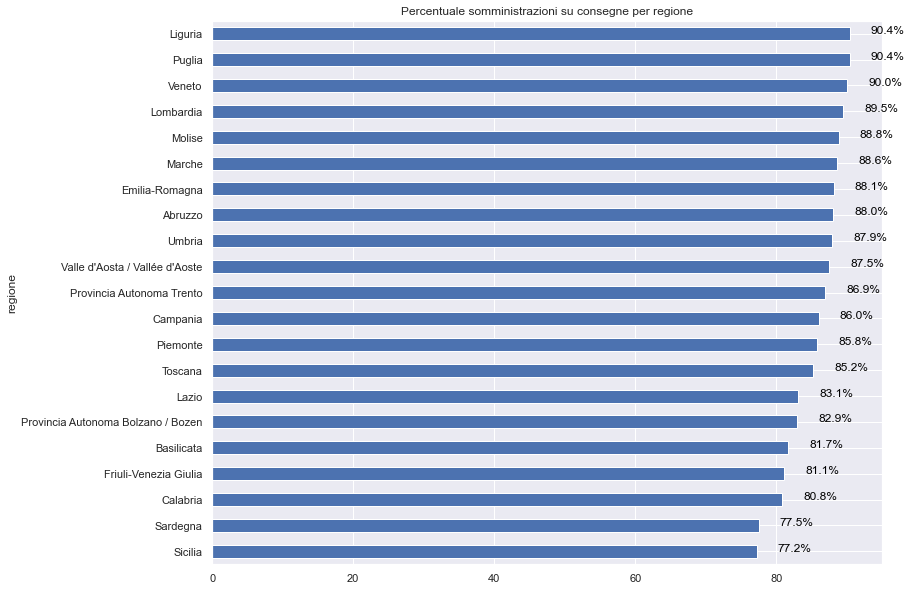

In [28]:
somministrazioni_consegne_regioni = df_somministrazioni.groupby('nome_area').sum()['totale']/df_consegne.groupby('nome_area').sum()['numero_dosi']
somministrazioni_consegne_regioni = round(somministrazioni_consegne_regioni.sort_values()*100, 1)
somministrazioni_consegne_regioni.plot(kind='barh', title='Percentuale somministrazioni su consegne per regione')
for index, row in enumerate(somministrazioni_consegne_regioni):
    plt.text(x = row+3 , y=index, s=f'{row}%', color='black')
plt.ylabel('regione')
plt.show()

In [29]:
df_somministrazioni_sett = u.get_dfweekly_from_df(df_somministrazioni_t, 'fornitore', 'totale')
df_somministrazioni_sett

,totale,fornitore
data_somministrazione,,
2020-12-27,7179,Pfizer/BioNTech
2021-01-03,117398,Pfizer/BioNTech
2021-01-10,549059,Pfizer/BioNTech
2021-01-17,540866,Pfizer/BioNTech
2021-01-24,229374,Pfizer/BioNTech
...,...,...
2021-04-18,1,Janssen
2021-04-25,12610,Janssen
2021-05-02,78386,Janssen


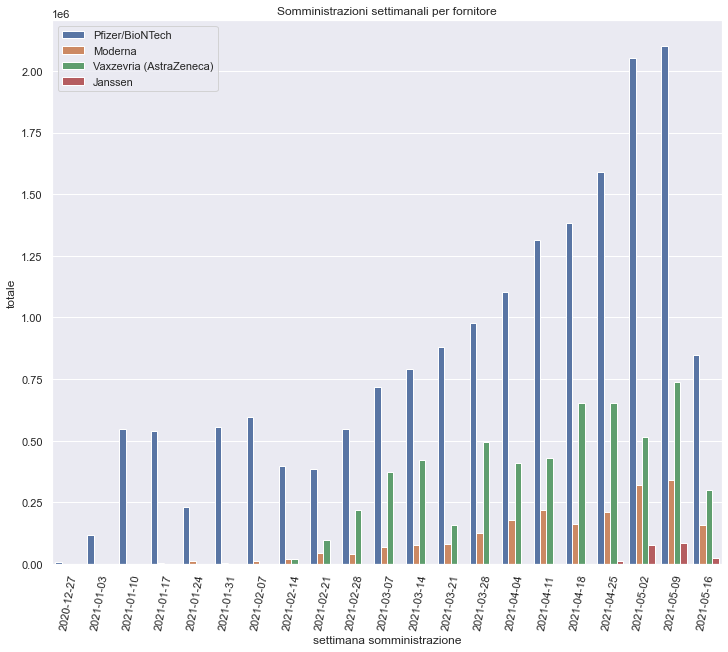

In [66]:
fig, ax = plt.subplots()
sns.barplot(data = df_somministrazioni_sett, x=df_somministrazioni_sett.index, y='totale', hue='fornitore',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fornitore')
plt.xticks(rotation=80)
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
ax.set_xticklabels(sorted(set(df_somministrazioni_sett.index.astype(str).values)))
plt.show()

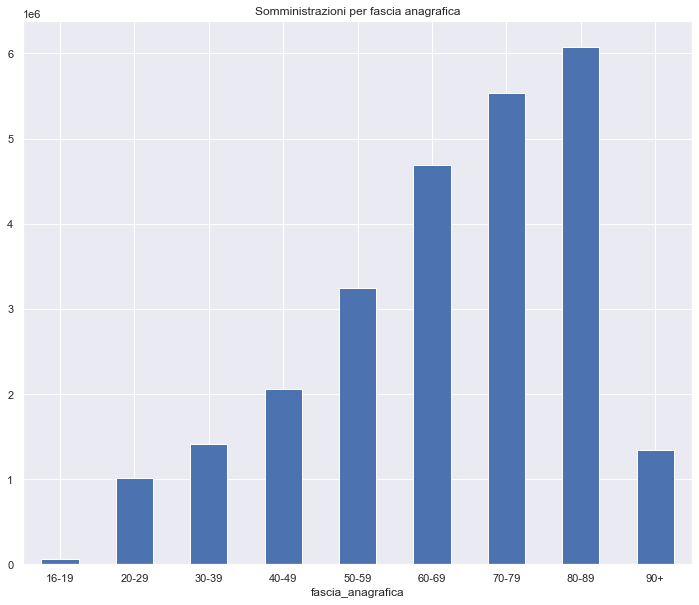

In [68]:
df_somministrazioni.groupby('fascia_anagrafica')['totale'].sum().plot(kind='bar')
plt.title('Somministrazioni per fascia anagrafica')
plt.xticks(rotation=0)
plt.show()

In [32]:
categorie = ['categoria_operatori_sanitari_sociosanitari',
       'categoria_personale_non_sanitario', 'categoria_ospiti_rsa',
       'categoria_60_69', 'categoria_70_79', 'categoria_over80',
       'categoria_forze_armate', 'categoria_personale_scolastico',
       'categoria_soggetti_fragili', 'categoria_altro']

In [33]:
d = {}
for c in categorie:
    d[c] = df_somministrazioni[c].sum()

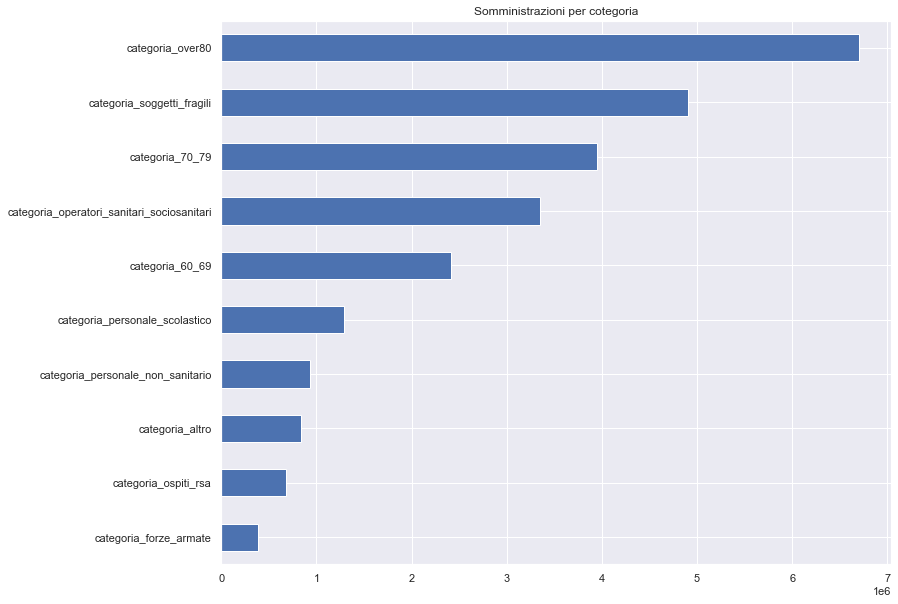

In [34]:
df_categorie = pd.Series(d)
df_categorie.sort_values().plot(kind='barh')
plt.title('Somministrazioni per cotegoria')
plt.show()

In [35]:
df_fasce_sett = u.get_dfweekly_from_df(df_somministrazioni_t, 'fascia_anagrafica', 'totale')
df_fasce_sett

,totale,fascia_anagrafica
data_somministrazione,,
2020-12-27,685,20-29
2021-01-03,11031,20-29
2021-01-10,52533,20-29
2021-01-17,61054,20-29
2021-01-24,21553,20-29
...,...,...
2021-04-18,5510,16-19
2021-04-25,6541,16-19
2021-05-02,10574,16-19


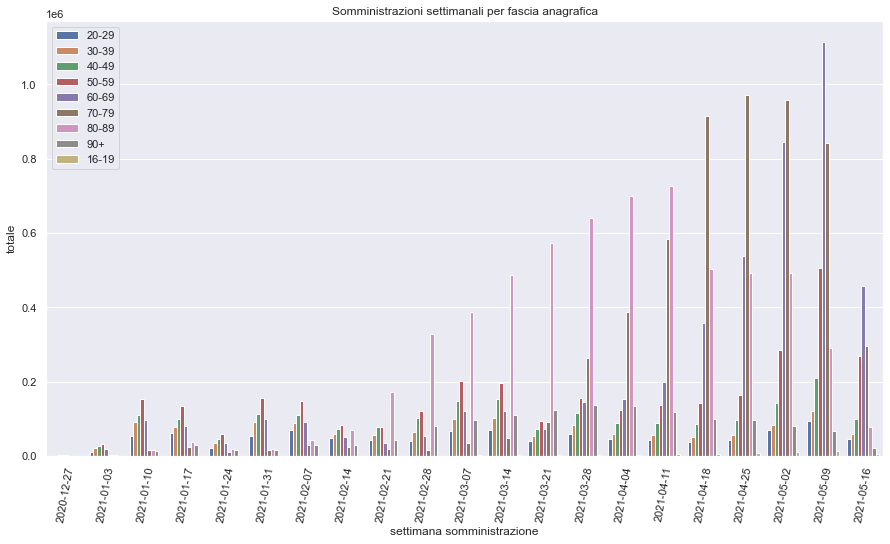

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data = df_fasce_sett, x=df_fasce_sett.index, y='totale', hue='fascia_anagrafica',ci=None, ax=ax)
plt.title('Somministrazioni settimanali per fascia anagrafica')
plt.legend(loc='upper left')
plt.xlabel('settimana somministrazione')
ax.set_xticklabels(sorted(set(df_fasce_sett.index.astype(str).values)), rotation=80)
# ax.xaxis.set_major_formatter(myFmt)
plt.show()